# Introduction
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

**What?** PyCaret on Hepatitis C Dataset

</font>
</div>

# What is PyCaret?
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- PyCaret is an open-source machine learning library for Python that reduces your time from preparing the dataset to test the model.
- Follow this link on how to install PyCaret for MAC OS https://pycaret.org/install/

</font>
</div>

# Import modules
<hr style = "border:2px solid black" ></hr>

In [1]:
import numpy as np
import numpy
import pandas as pd
from pycaret.classification import *

# Load the datatest
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- Hepatitis C Prediction dataset

</font>
</div>

In [2]:
df = pd.read_csv('../DATASETS/HepatitisCdata.csv')
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [3]:
# Removing one of the columns
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [4]:
df.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


# Prepare the data
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- The setup function does all the preprocessing steps.
- We can fill the missing value, transform the dataset, remove outliers etc

</font>
</div>

In [6]:
setup1 = setup(data=df, target='Category', session_id=123)

,Description,Value
0,session_id,123
1,Target,Category
2,Target Type,Multiclass
3,Label Encoded,"0=Blood Donor: 0, 0s=suspect Blood Donor: 1, 1=Hepatitis: 2, 2=Fibrosis: 3, 3=Cirrhosis: 4"
4,Original Data,"(615, 13)"
5,Missing Values,True
6,Numeric Features,11
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


<div class="alert alert-info">
<font color=black>

- If we want to set custom preprocessing steps, we can set parameters on the setup function. 
- For this case, let’s fill in the missing value on the dataset. 
- Look at line -->>24<-- for the result

</font>
</div>

In [7]:
setup2 = setup(data=df, target='Category', numeric_imputation='median', session_id=123)

,Description,Value
0,session_id,123
1,Target,Category
2,Target Type,Multiclass
3,Label Encoded,"0=Blood Donor: 0, 0s=suspect Blood Donor: 1, 1=Hepatitis: 2, 2=Fibrosis: 3, 3=Cirrhosis: 4"
4,Original Data,"(615, 13)"
5,Missing Values,True
6,Numeric Features,11
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


# Compare the model
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- One of the best feature of PyCaret is the compare_models functionality
- Model from Logistic Regression, Trees, XGBoost can be compared using a single line
- We'lluse **compare_model** function from the **pycaret.classification** library

</font>
</div>

In [8]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9326,0.3953,0.6389,0.9115,0.9193,0.6891,0.7023,0.2050
lightgbm,Light Gradient Boosting Machine,0.9326,0.3949,0.6161,0.9046,0.9159,0.6988,0.7104,0.0520
rf,Random Forest Classifier,0.9256,0.3949,0.6195,0.8982,0.9085,0.6666,0.6802,0.0870
lda,Linear Discriminant Analysis,0.9233,0.3861,0.6228,0.9158,0.9141,0.6571,0.6698,0.0060
xgboost,Extreme Gradient Boosting,0.9233,0.3949,0.5806,0.9046,0.9109,0.6689,0.6767,0.0760
svm,SVM - Linear Kernel,0.9186,0.0000,0.5679,0.8954,0.9023,0.6358,0.6574,0.0100
et,Extra Trees Classifier,0.9186,0.3936,0.5473,0.8756,0.8946,0.5979,0.6266,0.0780
lr,Logistic Regression,0.9140,0.3759,0.5974,0.9077,0.9082,0.6441,0.6496,0.4700
dt,Decision Tree Classifier,0.9093,0.3640,0.5191,0.9070,0.9039,0.6191,0.6265,0.0070
qda,Quadratic Discriminant Analysis,0.9093,0.3621,0.5180,0.8746,0.8885,0.5835,0.6013,0.0080


<div class="alert alert-info">
<font color=black>

- Gradient Boosting Classifier model has a good performance on almost all metrics.
- Light Gradient Boosting Machine has the second best performance and the results are not that far.
- LDA has the best precision metrics.
- We'll then use **GBC** for our next step

</font>
</div>

# Taking the best model and reproducing the results
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- **create_model** uses a 10-fold valdation as default.
- As you can see the results have been successfully fully validates.

</font>
</div>

In [9]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8605,0.9826,0.2000,0.8378,0.8490,0.4083,0.4126
1,0.9767,1.0000,0.9000,0.9884,0.9767,0.9087,0.9106
2,0.9767,0.9994,0.8000,0.9541,0.9653,0.9009,0.9063
3,0.8605,0.9705,0.4892,0.8605,0.8605,0.4522,0.4532
4,0.9302,0.0000,0.6250,0.9153,0.9149,0.6436,0.6566
5,0.9302,0.0000,0.5000,0.8705,0.8983,0.6006,0.6293
6,0.9302,0.0000,0.6250,0.9076,0.9188,0.6417,0.6469
7,0.9302,0.0000,0.6250,0.8890,0.9045,0.6446,0.6925
8,0.9535,0.0000,0.7500,0.9094,0.9308,0.7828,0.8053
9,0.9767,0.0000,0.8750,0.9826,0.9745,0.9075,0.9095


# Hyperparameter tuning
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- We can use the *tune_model* function for tuning the hyperparameter of our model
- To evaluate the model we could for instance plot the ROC Curve using the **plot_model** function

</font>
</div>

In [10]:
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8605,0.9794,0.3946,0.8419,0.8450,0.4545,0.4654
1,0.9302,0.9972,0.7000,0.9153,0.9149,0.7048,0.7157
2,0.9535,0.9978,0.7000,0.9496,0.9442,0.8170,0.8205
3,0.8605,0.9656,0.4892,0.8488,0.8527,0.4534,0.4563
4,0.9302,0.0000,0.6250,0.8959,0.9110,0.6427,0.6517
5,0.9302,0.0000,0.5000,0.8705,0.8983,0.6006,0.6293
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9302,0.0000,0.6250,0.9094,0.9153,0.6759,0.6929
8,0.9767,0.0000,0.8750,0.9774,0.9730,0.9002,0.9055
9,0.9535,0.0000,0.7917,0.9541,0.9498,0.8005,0.8052


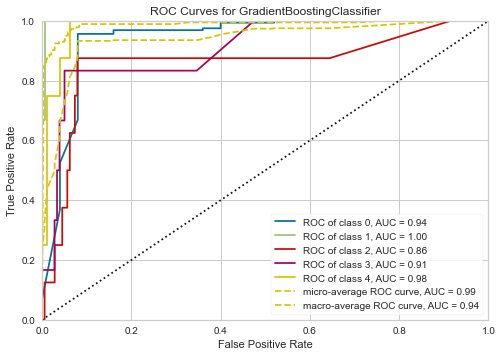

In [11]:
plot_model(tuned_gbc, plot='auc')

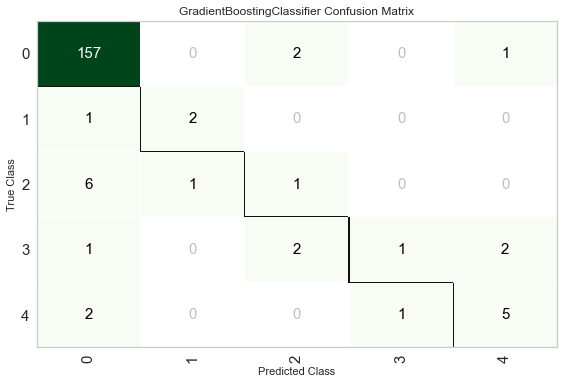

In [14]:
plot_model(tuned_gbc, plot="confusion_matrix")

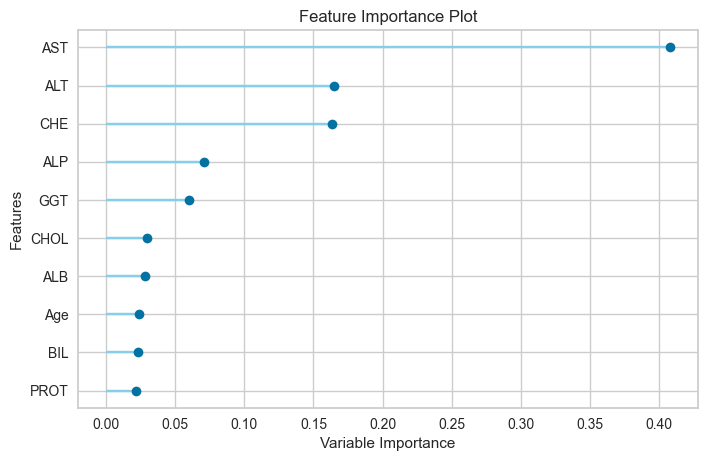

In [15]:
plot_model(tuned_gbc, plot='feature')

# Model testing
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- Now let’s test the model on the unseen data. 
- We can use a function called predict_model for the prediction and display the performance on each metric.
- You'll see the metric have lower value. 
- This is expected as the model is  working on data never seen before and our goal is to generalise not overfit the trainign data.

</font>
</div>

In [16]:
predict_model(tuned_gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8973,0.9391,0.5129,0.8758,0.8831,0.5237,0.5325


,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Sex_f,Category,Label,Score
0,39.0,47.000000,66.500000,24.799999,29.100000,10.500000,10.04,6.26,73.0,49.799999,78.400002,0.0,0=Blood Donor,0=Blood Donor,0.9970
1,33.0,46.400002,68.199997,10.300000,20.000000,5.700000,7.36,4.30,79.0,18.700001,68.599998,0.0,0=Blood Donor,0=Blood Donor,0.9962
2,49.0,43.299999,71.500000,28.400000,26.000000,6.200000,7.68,5.91,77.0,19.100000,76.900002,1.0,0=Blood Donor,0=Blood Donor,0.9973
3,61.0,43.400002,47.500000,12.800000,17.299999,5.600000,7.52,5.81,71.0,11.800000,69.900002,1.0,0=Blood Donor,0=Blood Donor,0.9974
4,33.0,40.599998,73.699997,12.600000,16.299999,3.100000,7.75,6.36,67.0,19.500000,71.400002,1.0,0=Blood Donor,0=Blood Donor,0.9973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,34.0,42.599998,27.000000,21.400000,21.700001,7.200000,8.15,6.79,85.0,13.900000,67.699997,0.0,0=Blood Donor,0=Blood Donor,0.5084
181,64.0,43.000000,52.700001,31.600000,29.200001,5.500000,11.69,6.00,63.0,61.900002,73.400002,1.0,0=Blood Donor,0=Blood Donor,0.9970
182,55.0,44.099998,60.000000,26.299999,25.900000,5.100000,7.23,7.30,88.0,41.599998,77.699997,0.0,0=Blood Donor,0=Blood Donor,0.9970
183,48.0,32.000000,66.300003,14.200000,21.299999,5.500000,4.72,5.23,41.0,17.200001,65.599998,1.0,0=Blood Donor,0=Blood Donor,0.9973


# Save the model
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- Before we can save the model, we need to retrain the model.
- This mean that we take the **tuned** settings and we train the model on the whole dataset.
- In PyCaret we do this via **finalise_model**.
- After the model has been retrained we dave the model via **save_model**.

</font>
</div>

In [17]:
final_gbc = finalize_model(tuned_gbc)

In [18]:
save_model(final_gbc, 'Final_Model_GBC_saved_viaByPyCaret')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Category',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_str...
                                             learning_rate=0.15, loss='deviance',
                                             max_depth=7, max_features=1.0,
                                             max_leaf_nodes=None,
                                             min_i

# Loading the model
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- In case you want to load the model on another project, you can use the **load_model** function.
    
</font>
</div>

In [19]:
modelFromDisk = load_model("Final_Model_GBC_saved_viaByPyCaret")

Transformation Pipeline and Model Successfully Loaded


# Conclusion
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-danger">
<font color=black>

- It offers a very quick and convenient way to quickly test all the model.
- One thing that I still need to sort out is how to get the parameter if I'd like to recreate the model in its native way.

</font>
</div>

# References
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

- https://towardsdatascience.com/automated-machine-learning-using-pycaret-4bb90ab3e2c7
- [PyCaret GitHub tutorials repository]()https://github.com/pycaret/pycaret/tree/master/tutorials
    
</font>
</div>